<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Module-Installation-(If-you-refresh-your-notebook)" data-toc-modified-id="Module-Installation-(If-you-refresh-your-notebook)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Module Installation (If you refresh your notebook)</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Run-The-Algorithms-(GARCH)" data-toc-modified-id="Run-The-Algorithms-(GARCH)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run The Algorithms (GARCH)</a></span></li><li><span><a href="#Run-The-Algorithms-(HAR)" data-toc-modified-id="Run-The-Algorithms-(HAR)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Run The Algorithms (HAR)</a></span></li><li><span><a href="#Run-The-Algorithms-(EN)" data-toc-modified-id="Run-The-Algorithms-(EN)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Run The Algorithms (EN)</a></span><ul class="toc-item"><li><span><a href="#M4" data-toc-modified-id="M4-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>M4</a></span></li><li><span><a href="#Preparation-for-M1" data-toc-modified-id="Preparation-for-M1-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Preparation for M1</a></span><ul class="toc-item"><li><span><a href="#Chunk-1" data-toc-modified-id="Chunk-1-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Chunk 1</a></span></li><li><span><a href="#Chunk-2" data-toc-modified-id="Chunk-2-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Chunk 2</a></span></li><li><span><a href="#Chunk-3" data-toc-modified-id="Chunk-3-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Chunk 3</a></span></li></ul></li></ul></li></ul></div>

# Module Installation (If you refresh your notebook)

In [1]:
!pip install arch
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.4/918.4 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.9 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 31.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 39.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.2
    Uninstalling scipy-1.9.2:
      Successfully uninstalled scipy-1.9.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.2 MB/s eta 0:00:00


# Import Libraries

In [1]:
import sys, os
import pandas as pd
import numpy as np

sys.path.append('../python')
pd.set_option('display.max_columns', 100)

from dataprocessingnew2 import *
# from dataprocessingnew import *
from runmodels import *
from util import Run_Algorithms

In [2]:
dataprocessing = DataProcessing('2006-01-01', '2022-12-01', daily=True)
df_clean, train_df, test_df = dataprocessing.clean_final(fillna = True)
# %store train_df
# %store test_df

print(len(train_df.Asset.unique()))

209
(389669, 25)
85


In [7]:
%store test_df
%store train_df

Stored 'test_df' (DataFrame)
Stored 'train_df' (DataFrame)


In [2]:
%store -r train_df
%store -r test_df

In [3]:
coverage_df = pd.read_csv('../data/coverage_dataframe.csv')[['PermID', 'Name', 'TRBCEconomicSector']]
coverage_df['PermID'] = coverage_df.PermID.astype(int)
unique_assets_df = pd.DataFrame({
    'Assets': train_df.Asset.unique()
})

unique_assets_df = pd.merge(unique_assets_df, coverage_df, how = 'left', left_on = 'Assets', right_on= 'PermID')
unique_assets_df = unique_assets_df.iloc[:, 1:]
unique_assets_df.columns = ['Assets', 'Firm Name', 'Economic Sector']

In [4]:
unique_assets_df[['Economic Sector','Assets']].groupby(['Economic Sector']).count()

,Assets
Economic Sector,
Basic materials,11
Consumer cyclicals,15
Consumer non-cyclicals,13
Energy,2
Financials,16
Healthcare,4
Industrials,13
Real estate,3
Technology,3


In [5]:
list_assets = train_df.Asset.unique()

In [6]:
def split_list(lst, chunks):
    n = len(lst)
    size = n // chunks
    leftovers= n % chunks
    chunk_start = 0
    for i in range(chunks):
        if i < leftovers:
            # take an extra element
            chunk_end = chunk_start + size + 1
        else:
            chunk_end = chunk_start + size
        yield lst[chunk_start:chunk_end] 
        chunk_start = chunk_end

In [7]:
count = 1
for i in split_list(list_assets, 3):
        # Save as .npy
    
    np.save(f'../data/asset_chunks_final_check_{count}.npy', i)
    count+=1

In [2]:
# Store a variable
# %store train_df
# %store test_df

# Now you can restart the kernel or even close and reopen Jupyter.

# After restarting the kernel, load the variable
# %store -r train_df

%store -r train_df
%store -r test_df

# Run The Algorithms (GARCH)

In [5]:
# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df, test_df, algorithms='GARCH', sample= False, plot_export= True, res_export= True)

mresults = run_algorithms.compile_train_test()

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'V^YZ']


/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univaria

KeyboardInterrupt: 

In [ ]:
np.mean(mresults['MSE^3'])

# Run The Algorithms (HAR)

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'V^YZ']


NameError: name 'algorithms' is not defined

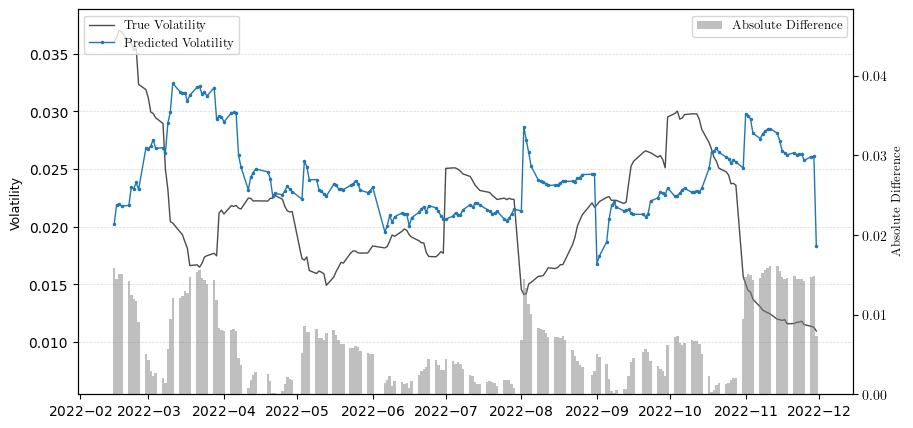

In [6]:
# You can left the 'features' null when running HAR.
run_algorithms = RunModels(train_df, test_df, algorithms='HAR', features='m1', sample= True, plot_export= True, res_export= False)

mresults_HAR_m1 = run_algorithms.compile_train_test()

In [10]:
np.mean(mresults_HAR_m1['MSE^3'])

0.08330220912402332

In [9]:
np.mean(mresults_HAR_m1['MSE^3'])

0.08330220912402332

---

In [10]:
# You can left the 'features' null when running HAR.
run_algorithms = RunModels(train_df, test_df, algorithms='HAR', features='m2', sample= False, plot_export= False, res_export= True)

mresults_HAR_m2 = run_algorithms.compile_train_test()

after feature selections ['buzz', 'Community', 'EnvironmentalInnovation', 'ProductResponsibility', 'Workforce', 'V^YZ']


In [12]:
np.mean(mresults_HAR_m2['MSE^3'])

0.08165941138932906

In [11]:
np.mean(mresults_HAR_m2['MSE^3'])

0.1134138106039007

---

In [15]:
# You can left the 'features' null when running HAR.
run_algorithms = RunModels(train_df, test_df, algorithms='HAR', features='m3', sample= False, plot_export= False, res_export= True)

mresults_HAR_m3 = run_algorithms.compile_train_test()

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'buzz', 'ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'Community', 'EnvironmentalInnovation', 'Management', 'ProductResponsibility', 'Shareholders', 'Workforce', 'V^YZ']


In [14]:
np.mean(mresults_HAR_m3['MSE^3'])

0.138227564999976

In [16]:
np.mean(mresults_HAR_m3['MSE^3'])

0.138227564999976

---

In [6]:
# You can left the 'features' null when running HAR.
run_algorithms = RunModels(train_df, test_df, algorithms='HAR', features='m4', sample= False, plot_export= False, res_export= True)

mresults_HAR_m3 = run_algorithms.compile_train_test()

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'buzz', 'ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'Community', 'EnvironmentalInnovation', 'Management', 'ProductResponsibility', 'Shareholders', 'Workforce', 'noise_beta_0.0_gamma_0.25', 'V^YZ']


In [7]:
np.mean(mresults_HAR_m3['MSE^3'])

0.13841745966933516

---

In [8]:
# You can left the 'features' null when running HAR.
run_algorithms = RunModels(train_df, test_df, algorithms='HAR', features='m5', sample= False, plot_export= False, res_export= True)

mresults_HAR_m3 = run_algorithms.compile_train_test()

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'buzz', 'ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'Community', 'EnvironmentalInnovation', 'Management', 'ProductResponsibility', 'Shareholders', 'Workforce', 'noise_beta_0.0_gamma_0.25', 'noise_beta_0.0_gamma_0.5', 'noise_beta_0.0_gamma_1.0', 'noise_beta_0.5_gamma_0.25', 'noise_beta_0.5_gamma_0.5', 'V^YZ']


In [9]:
np.mean(mresults_HAR_m3['MSE^3'])

0.1382623901203846

---

In [10]:
# You can left the 'features' null when running HAR.
run_algorithms = RunModels(train_df, test_df, algorithms='HAR', features='m6', sample= False, plot_export= False, res_export= True)

mresults_HAR_m3 = run_algorithms.compile_train_test()

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'buzz', 'ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'Community', 'EnvironmentalInnovation', 'Management', 'ProductResponsibility', 'Shareholders', 'Workforce', 'noise_beta_0.0_gamma_0.25', 'noise_beta_0.0_gamma_0.5', 'noise_beta_0.0_gamma_1.0', 'noise_beta_0.5_gamma_0.25', 'noise_beta_0.5_gamma_0.5', 'noise_beta_0.5_gamma_1.0', 'noise_beta_0.75_gamma_0.25', 'noise_beta_0.75_gamma_0.5', 'noise_beta_0.75_gamma_1.0', 'noise_beta_0.9_gamma_0.25', 'V^YZ']


In [11]:
np.mean(mresults_HAR_m3['MSE^3'])

0.14057789838205642

In [ ]:
%

# Run The Algorithms (EN)

In [15]:
# import sys, os
# import pandas as pd
# import numpy as np

# sys.path.append('../python')
# pd.set_option('display.max_columns', 100)

# from dataprocessing import *
# from runmodels import *
# from util import Run_Algorithms

# %store -r train_df
# %store -r test_df

In [26]:
# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df, test_df, algorithms='EN', features='m1', sample= False, plot_export= False, res_export= True)

mresults_EN_m1 = run_algorithms.compile_train_test()

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'V^YZ']
Execute Training and Walk Forward Testing for (DCC PLC-4295874865) for 200 times..
------------------------------ 0.4268379211425781 seconds | MAE: 0.011 ------------------------------
Execute Training and Walk Forward Testing for (Berkeley Group Holdings PLC-4295893899) for 200 times..
------------------------------ 0.15136313438415527 seconds | MAE: 0.017 ------------------------------
Execute Training and Walk Forward Testing for (Hikma Pharmaceuticals PLC-4295897408) for 200 times..
------------------------------ 0.1950678825378418 seconds | MAE: 0.027 ------------------------------
Execute Training and Walk Forward Testing for (TUI AG-4295869210) for 200 times..
------------------------------ 0.1428389549255371 seconds | MAE: 0.039 ------------------------------
Execute Training and Walk Forward Testing for (St James's Place PLC-4295898928) for 200 times..
-----------------------------

------------------------------ 0.38667988777160645 seconds | MAE: 0.004 ------------------------------
Execute Training and Walk Forward Testing for (Antofagasta PLC-4295898060) for 200 times..
------------------------------ 0.31793785095214844 seconds | MAE: 0.021 ------------------------------
Execute Training and Walk Forward Testing for (ITV PLC-4295897705) for 200 times..
------------------------------ 0.2633512020111084 seconds | MAE: 0.151 ------------------------------
Execute Training and Walk Forward Testing for (WM Morrison Supermarkets Ltd-4295897683) for 200 times..
------------------------------ 0.26966285705566406 seconds | MAE: 0.012 ------------------------------
Execute Training and Walk Forward Testing for (Vodafone Group PLC-4295896661) for 200 times..
------------------------------ 0.3371090888977051 seconds | MAE: 0.016 ------------------------------
Execute Training and Walk Forward Testing for (Severn Trent PLC-4295896619) for 200 times..
-----------------------

------------------------------ 0.33411240577697754 seconds | MAE: 0.022 ------------------------------


In [29]:
np.mean(mresults_EN_m1['MSE^3'])

0.09127261735972837

---

In [27]:
# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df, test_df, algorithms='EN', features='m2', sample= False, plot_export= False, res_export= True)

mresults_EN_m2 = run_algorithms.compile_train_test()

after feature selections ['buzz', 'Community', 'EnvironmentalInnovation', 'ProductResponsibility', 'Workforce', 'V^YZ']
Execute Training and Walk Forward Testing for (DCC PLC-4295874865) for 200 times..
------------------------------ 0.19454288482666016 seconds | MAE: 0.011 ------------------------------
Execute Training and Walk Forward Testing for (Berkeley Group Holdings PLC-4295893899) for 200 times..
------------------------------ 0.6256601810455322 seconds | MAE: 0.017 ------------------------------
Execute Training and Walk Forward Testing for (Hikma Pharmaceuticals PLC-4295897408) for 200 times..
------------------------------ 0.22767114639282227 seconds | MAE: 0.027 ------------------------------
Execute Training and Walk Forward Testing for (TUI AG-4295869210) for 200 times..
------------------------------ 0.16831684112548828 seconds | MAE: 0.039 ------------------------------
Execute Training and Walk Forward Testing for (St James's Place PLC-4295898928) for 200 times..
----

------------------------------ 0.7523000240325928 seconds | MAE: 0.004 ------------------------------
Execute Training and Walk Forward Testing for (Antofagasta PLC-4295898060) for 200 times..
------------------------------ 1.1697561740875244 seconds | MAE: 0.021 ------------------------------
Execute Training and Walk Forward Testing for (ITV PLC-4295897705) for 200 times..
------------------------------ 0.7306439876556396 seconds | MAE: 0.151 ------------------------------
Execute Training and Walk Forward Testing for (WM Morrison Supermarkets Ltd-4295897683) for 200 times..
------------------------------ 0.5224390029907227 seconds | MAE: 0.012 ------------------------------
Execute Training and Walk Forward Testing for (Vodafone Group PLC-4295896661) for 200 times..
------------------------------ 3.457556962966919 seconds | MAE: 0.016 ------------------------------
Execute Training and Walk Forward Testing for (Severn Trent PLC-4295896619) for 200 times..
---------------------------

------------------------------ 0.8810467720031738 seconds | MAE: 0.008 ------------------------------


In [30]:
np.mean(mresults_EN_m2['MSE^3'])

0.08156498648014643

---

In [28]:
# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df, test_df, algorithms='EN', features='m3', sample= False, plot_export= False, res_export= True)

mresults_EN_m3 = run_algorithms.compile_train_test()

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'buzz', 'ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'Community', 'EnvironmentalInnovation', 'Management', 'ProductResponsibility', 'Shareholders', 'Workforce', 'V^YZ']
Execute Training and Walk Forward Testing for (DCC PLC-4295874865) for 200 times..
------------------------------ 0.6354231834411621 seconds | MAE: 0.011 ------------------------------
Execute Training and Walk Forward Testing for (Berkeley Group Holdings PLC-4295893899) for 200 times..
------------------------------ 2.2226407527923584 seconds | MAE: 0.017 ------------------------------
Execute Training and Walk Forward Testing for (Hikma Pharmaceuticals PLC-4295897408) for 200 times..
------------------------------ 0.3774299621582031 seconds | MAE: 0.027 ------------------------------
Execute Training and Walk Forward Testing for (TUI AG-4295869210) for 200 times..
-----------

------------------------------ 1.1777441501617432 seconds | MAE: 0.032 ------------------------------
Execute Training and Walk Forward Testing for (Sage Group PLC-4295898763) for 200 times..
------------------------------ 0.8414418697357178 seconds | MAE: 0.004 ------------------------------
Execute Training and Walk Forward Testing for (Antofagasta PLC-4295898060) for 200 times..
------------------------------ 1.3232402801513672 seconds | MAE: 0.021 ------------------------------
Execute Training and Walk Forward Testing for (ITV PLC-4295897705) for 200 times..
------------------------------ 0.7858967781066895 seconds | MAE: 0.151 ------------------------------
Execute Training and Walk Forward Testing for (WM Morrison Supermarkets Ltd-4295897683) for 200 times..
------------------------------ 0.686654806137085 seconds | MAE: 0.012 ------------------------------
Execute Training and Walk Forward Testing for (Vodafone Group PLC-4295896661) for 200 times..
-----------------------------

------------------------------ 0.9771082401275635 seconds | MAE: 0.036 ------------------------------
Execute Training and Walk Forward Testing for (Shell PLC-4295885039) for 200 times..
------------------------------ 0.9881901741027832 seconds | MAE: 0.008 ------------------------------


In [17]:
np.mean(mresults_EN_m3['MSE^3'])

0.08156498648014643

---

## M4

In [18]:
# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df, test_df, algorithms='EN', features='m4', sample= False, plot_export= False, res_export= False)

mresults_EN_m4 = run_algorithms.compile_train_test()

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'buzz', 'ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'Community', 'EnvironmentalInnovation', 'Management', 'ProductResponsibility', 'Shareholders', 'Workforce', 'noise_beta_0.0_gamma_0.25', 'V^YZ']
Execute Training and Walk Forward Testing for (DCC PLC-4295874865) for 200 times..
------------------------------ 0.5382099151611328 seconds | MAE: 0.011 ------------------------------
Execute Training and Walk Forward Testing for (Berkeley Group Holdings PLC-4295893899) for 200 times..
------------------------------ 2.2921547889709473 seconds | MAE: 0.017 ------------------------------
Execute Training and Walk Forward Testing for (Hikma Pharmaceuticals PLC-4295897408) for 200 times..
------------------------------ 0.235015869140625 seconds | MAE: 0.027 ------------------------------
Execute Training and Walk Forward Testing for (TUI AG-4295869210)

------------------------------ 0.7222001552581787 seconds | MAE: 0.032 ------------------------------
Execute Training and Walk Forward Testing for (Sage Group PLC-4295898763) for 200 times..
------------------------------ 0.671522855758667 seconds | MAE: 0.004 ------------------------------
Execute Training and Walk Forward Testing for (Antofagasta PLC-4295898060) for 200 times..
------------------------------ 0.721534013748169 seconds | MAE: 0.021 ------------------------------
Execute Training and Walk Forward Testing for (ITV PLC-4295897705) for 200 times..
------------------------------ 0.5830488204956055 seconds | MAE: 0.151 ------------------------------
Execute Training and Walk Forward Testing for (WM Morrison Supermarkets Ltd-4295897683) for 200 times..
------------------------------ 0.5853970050811768 seconds | MAE: 0.012 ------------------------------
Execute Training and Walk Forward Testing for (Vodafone Group PLC-4295896661) for 200 times..
------------------------------

------------------------------ 0.763883113861084 seconds | MAE: 0.036 ------------------------------
Execute Training and Walk Forward Testing for (Shell PLC-4295885039) for 200 times..
------------------------------ 1.033221960067749 seconds | MAE: 0.008 ------------------------------


In [20]:
np.mean(mresults_EN_m4['MSE^3'])

0.08156498648014643

---

In [23]:
# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df, test_df, algorithms='EN', features='m5', sample= False, plot_export= False, res_export= False)

mresults_EN_m5 = run_algorithms.compile_train_test()
print(np.mean(mresults_EN_m5['MSE^3']))

after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'buzz', 'ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'Community', 'EnvironmentalInnovation', 'Management', 'ProductResponsibility', 'Shareholders', 'Workforce', 'noise_beta_0.0_gamma_0.25', 'noise_beta_0.0_gamma_0.5', 'noise_beta_0.0_gamma_1.0', 'noise_beta_0.5_gamma_0.25', 'noise_beta_0.5_gamma_0.5', 'V^YZ']
Execute Training and Walk Forward Testing for (DCC PLC-4295874865) for 200 times..
------------------------------ 0.3228800296783447 seconds | MAE: 0.011 ------------------------------
Execute Training and Walk Forward Testing for (Berkeley Group Holdings PLC-4295893899) for 200 times..
------------------------------ 2.1997570991516113 seconds | MAE: 0.017 ------------------------------
Execute Training and Walk Forward Testing for (Hikma Pharmaceuticals PLC-4295897408) for 200 times..
------------------------------ 0.44450998306274414 se

------------------------------ 0.8561530113220215 seconds | MAE: 0.032 ------------------------------
Execute Training and Walk Forward Testing for (Sage Group PLC-4295898763) for 200 times..
------------------------------ 0.8345739841461182 seconds | MAE: 0.004 ------------------------------
Execute Training and Walk Forward Testing for (Antofagasta PLC-4295898060) for 200 times..
------------------------------ 0.7356429100036621 seconds | MAE: 0.021 ------------------------------
Execute Training and Walk Forward Testing for (ITV PLC-4295897705) for 200 times..
------------------------------ 0.6438889503479004 seconds | MAE: 0.151 ------------------------------
Execute Training and Walk Forward Testing for (WM Morrison Supermarkets Ltd-4295897683) for 200 times..
------------------------------ 0.601952075958252 seconds | MAE: 0.012 ------------------------------
Execute Training and Walk Forward Testing for (Vodafone Group PLC-4295896661) for 200 times..
-----------------------------

------------------------------ 1.6007258892059326 seconds | MAE: 0.036 ------------------------------
Execute Training and Walk Forward Testing for (Shell PLC-4295885039) for 200 times..
------------------------------ 1.0771889686584473 seconds | MAE: 0.008 ------------------------------
0.08156498648014643


In [24]:
# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df, test_df, algorithms='EN', features='m6', sample= False, plot_export= False, res_export= False)

mresults_EN_m5 = run_algorithms.compile_train_test()


after feature selections ['vol_series_daily', 'vol_series_weekly', 'vol_series_monthly', 'buzz', 'ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'Community', 'EnvironmentalInnovation', 'Management', 'ProductResponsibility', 'Shareholders', 'Workforce', 'noise_beta_0.0_gamma_0.25', 'noise_beta_0.0_gamma_0.5', 'noise_beta_0.0_gamma_1.0', 'noise_beta_0.5_gamma_0.25', 'noise_beta_0.5_gamma_0.5', 'noise_beta_0.5_gamma_1.0', 'noise_beta_0.75_gamma_0.25', 'noise_beta_0.75_gamma_0.5', 'noise_beta_0.75_gamma_1.0', 'noise_beta_0.9_gamma_0.25', 'V^YZ']
Execute Training and Walk Forward Testing for (DCC PLC-4295874865) for 200 times..
------------------------------ 0.6745240688323975 seconds | MAE: 0.011 ------------------------------
Execute Training and Walk Forward Testing for (Berkeley Group Holdings PLC-4295893899) for 200 times..
------------------------------ 2.6266889572143555 seconds | MAE: 0.017 ------------------------------
Execute T

------------------------------ 1.302419900894165 seconds | MAE: 0.014 ------------------------------
Execute Training and Walk Forward Testing for (BAE Systems PLC-5000001291) for 200 times..
------------------------------ 1.1691431999206543 seconds | MAE: 0.032 ------------------------------
Execute Training and Walk Forward Testing for (Sage Group PLC-4295898763) for 200 times..
------------------------------ 1.1111419200897217 seconds | MAE: 0.004 ------------------------------
Execute Training and Walk Forward Testing for (Antofagasta PLC-4295898060) for 200 times..
------------------------------ 1.040834903717041 seconds | MAE: 0.021 ------------------------------
Execute Training and Walk Forward Testing for (ITV PLC-4295897705) for 200 times..
------------------------------ 0.9433879852294922 seconds | MAE: 0.151 ------------------------------
Execute Training and Walk Forward Testing for (WM Morrison Supermarkets Ltd-4295897683) for 200 times..
------------------------------ 0.

------------------------------ 9.4860520362854 seconds | MAE: 0.021 ------------------------------
Execute Training and Walk Forward Testing for (Persimmon PLC-4295894068) for 200 times..
------------------------------ 1.0853686332702637 seconds | MAE: 0.036 ------------------------------
Execute Training and Walk Forward Testing for (Shell PLC-4295885039) for 200 times..
------------------------------ 1.1413638591766357 seconds | MAE: 0.008 ------------------------------


NameError: name 'mresults_EN_m6' is not defined

In [25]:
print(np.mean(mresults_EN_m5['MSE^3']))

0.08156498648014643


In [22]:
# You can left the 'features' null when running GARCH.
run_algorithms = Run_Algorithms(train_df, test_df, algorithms='EN', features='m5', sample= False, plot_export= False, res_export= False)

mresults_RF_m5 = run_algorithms.compile_train_test()

['buzz', 'Community', 'EnvironmentalInnovation', 'ProductResponsibility', 'Workforce', 'V^YZ']
Execute Training and Walk Forward Testing for (DCC PLC-4295874865) for 516 times..
------------------------------ 0.4562230110168457 seconds | MAE: 0.012 ------------------------------
Execute Training and Walk Forward Testing for (Berkeley Group Holdings PLC-4295893899) for 454 times..
------------------------------ 1.79697585105896 seconds | MAE: 0.022 ------------------------------
Execute Training and Walk Forward Testing for (Hikma Pharmaceuticals PLC-4295897408) for 377 times..
------------------------------ 0.2738478183746338 seconds | MAE: 0.036 ------------------------------
Execute Training and Walk Forward Testing for (TUI AG-4295869210) for 377 times..
------------------------------ 0.2459731101989746 seconds | MAE: 0.060 ------------------------------
Execute Training and Walk Forward Testing for (St James's Place PLC-4295898928) for 649 times..
------------------------------ 0.5

KeyboardInterrupt: 

In [ ]:
# You can left the 'features' null when running GARCH.
run_algorithms = Run_Algorithms(train_df, test_df, algorithms='RF', features='m6', sample= False, plot_export= True, res_export= True)

mresults_RF_m1 = run_algorithms.compile_train_test()

In [ ]:
# You can left the 'features' null when running GARCH.
run_algorithms = Run_Algorithms(train_df, test_df, algorithms='RF', features='m3', sample= False, plot_export= True, res_export= True)

mresults_RF_m3 = run_algorithms.compile_train_test()

---

## Preparation for M1

In [38]:
top100 = np.load('../data/asset_FTSE_PIT_END2022.npy')
top100 = [int(i) for i in top100]

In [39]:
clean_df = pd.concat([train_df[train_df.Asset.isin(top100)], test_df[test_df.Asset.isin(top100)]])

In [40]:
len(clean_df.Asset.unique())

81

In [30]:
tt_df = clean_df[['Asset','date_key']].groupby(['Asset'], as_index=False).count().sort_values('date_key', ascending=False)

In [32]:
tt_df[tt_df['date_key'] > 1000]

,Asset,date_key
42,4295895403,3987
51,4295896494,3987
30,4295894968,3987
33,4295895043,3987
34,4295895145,3987
...,...,...
35,4295895174,1327
4,4295893899,1263
78,5047641169,1247
2,4295874981,1238


In [37]:
1000/(5*4*12)

4.166666666666667

### Chunk 1

In [14]:
import sys, os
import pandas as pd
import numpy as np

sys.path.append('../python')
pd.set_option('display.max_columns', 100)

from dataprocessing import *
from runmodels import *

dataprocessing = DataProcessing('2006-01-01', '2022-12-01', daily=True)
df_clean, train_df, test_df = dataprocessing.clean_final(fillna = True)

asset_1 = np.load('../data/asset_chunks_1.npy')

train_df_1 = train_df[train_df.Asset.isin(asset_1)]
test_df_1 = test_df[test_df.Asset.isin(asset_1)]

# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df_1, test_df_1, algorithms='RF', features='m1', sample= False, plot_export= False, res_export= True)
mresults_RF_m1 = run_algorithms.compile_train_test()

### Chunk 2

In [ ]:
import sys, os
import pandas as pd
import numpy as np

sys.path.append('../python')
pd.set_option('display.max_columns', 100)

from dataprocessing import *
from runmodels import *

dataprocessing = DataProcessing('2006-01-01', '2022-12-01', daily=True)
df_clean, train_df, test_df = dataprocessing.clean_final(fillna = True)

asset_1 = np.load('../data/asset_chunks_2.npy')

train_df_1 = train_df[train_df.Asset.isin(asset_1)]
test_df_1 = test_df[test_df.Asset.isin(asset_1)]

# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df_1, test_df_1, algorithms='RF', features='m1', sample= False, plot_export= False, res_export= True)
mresults_RF_m1 = run_algorithms.compile_train_test()

### Chunk 3

In [ ]:
import sys, os
import pandas as pd
import numpy as np

sys.path.append('../python')
pd.set_option('display.max_columns', 100)

from dataprocessing import *
from runmodels import *

dataprocessing = DataProcessing('2006-01-01', '2022-12-01', daily=True)
df_clean, train_df, test_df = dataprocessing.clean_final(fillna = True)

asset_1 = np.load('../data/asset_chunks_2.npy')

train_df_1 = train_df[train_df.Asset.isin(asset_1)]
test_df_1 = test_df[test_df.Asset.isin(asset_1)]

# You can left the 'features' null when running GARCH.
run_algorithms = RunModels(train_df_1, test_df_1, algorithms='RF', features='m1', sample= False, plot_export= False, res_export= True)
mresults_RF_m1 = run_algorithms.compile_train_test()

---

In [1]:
import sys, os
import pandas as pd
import numpy as np

sys.path.append('../python')
pd.set_option('display.max_columns', 100)

from dataprocessingnew2 import *
from runmodels import *
from util import Run_Algorithms

In [16]:
deltatime = pd.to_datetime('2006-03-02') - pd.to_datetime('2006-02-02') 
pointertime = pd.to_datetime('2006-02-02')  + deltatime
print(pointertime)

2006-03-02 00:00:00


In [8]:
sample_df = train_df[train_df['Asset'] == 4295885039]
sample_df['Date (shifted)'] = pd.to_datetime(sample_df['Date (shifted)'])

In [27]:
sample_df['Date+Delta'] = sample_df['Date (shifted)'].apply(lambda x: x + deltatime)

In [28]:
sample_df.head()

,Date (shifted),Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,col_merge,date_key,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,Community,EnvironmentalInnovation,Management,ProductResponsibility,Shareholders,Workforce,vol_series_daily,vol_series_weekly,vol_series_monthly,Date+Delta
col_merge,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-02-02,2006-03-02,4295885039,18.889998,18.889998,18.599991,18.659988,-0.023548,0.012727,0.007673,0.009391,2006-02-02,2006-02-02,36364.5,57.0,38.0,18.0,81.0,66.0,24.0,57.0,93.0,81.0,82.0,4.0,1.0,0.009270,0.009865,0.010094,2006-03-30
2006-02-03,2006-03-03,4295885039,18.609986,18.649993,18.359986,18.500000,-0.008574,0.012091,0.008085,0.009501,2006-02-03,2006-02-03,36448.0,57.0,38.0,19.0,82.0,66.0,24.0,56.0,93.0,81.0,78.0,4.0,1.0,0.009391,0.009681,0.010087,2006-03-31
2006-02-06,2006-03-06,4295885039,18.529998,18.629988,18.469986,18.579986,0.004324,0.012052,0.008025,0.009514,2006-02-06,2006-02-06,36485.0,58.0,39.0,19.0,83.0,66.0,24.0,60.0,93.0,80.0,80.0,4.0,1.0,0.009501,0.009532,0.010070,2006-04-03
2006-02-07,2006-03-07,4295885039,18.519988,18.589996,18.289993,18.319991,-0.013993,0.011961,0.008081,0.009561,2006-02-07,2006-02-07,36591.0,58.0,39.0,20.0,84.0,66.0,25.0,62.0,94.0,80.0,77.0,4.0,1.0,0.009514,0.009443,0.010054,2006-04-04
2006-02-08,2006-03-08,4295885039,18.059998,18.079986,17.899993,17.979996,-0.018559,0.011792,0.008239,0.009644,2006-02-08,2006-02-08,36679.5,58.0,39.0,20.0,84.0,66.0,25.0,63.0,94.0,80.0,77.0,4.0,1.0,0.009561,0.009447,0.010039,2006-04-05


In [18]:
sample_df[sample_df.date_key > (sample_df.date_key+pointertime)]

TypeError: cannot add DatetimeArray and Timestamp

In [10]:
sample_df.head()

,Date (shifted),Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,col_merge,date_key,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,Community,EnvironmentalInnovation,Management,ProductResponsibility,Shareholders,Workforce,vol_series_daily,vol_series_weekly,vol_series_monthly
col_merge,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-02-02,2006-03-02 00:00:00,4295885039,18.889998,18.889998,18.599991,18.659988,-0.023548,0.012727,0.007673,0.009391,2006-02-02,2006-02-02,36364.5,57.0,38.0,18.0,81.0,66.0,24.0,57.0,93.0,81.0,82.0,4.0,1.0,0.009270,0.009865,0.010094
2006-02-03,2006-03-03 00:00:00,4295885039,18.609986,18.649993,18.359986,18.500000,-0.008574,0.012091,0.008085,0.009501,2006-02-03,2006-02-03,36448.0,57.0,38.0,19.0,82.0,66.0,24.0,56.0,93.0,81.0,78.0,4.0,1.0,0.009391,0.009681,0.010087
2006-02-06,2006-03-06 00:00:00,4295885039,18.529998,18.629988,18.469986,18.579986,0.004324,0.012052,0.008025,0.009514,2006-02-06,2006-02-06,36485.0,58.0,39.0,19.0,83.0,66.0,24.0,60.0,93.0,80.0,80.0,4.0,1.0,0.009501,0.009532,0.010070
2006-02-07,2006-03-07 00:00:00,4295885039,18.519988,18.589996,18.289993,18.319991,-0.013993,0.011961,0.008081,0.009561,2006-02-07,2006-02-07,36591.0,58.0,39.0,20.0,84.0,66.0,25.0,62.0,94.0,80.0,77.0,4.0,1.0,0.009514,0.009443,0.010054
2006-02-08,2006-03-08 00:00:00,4295885039,18.059998,18.079986,17.899993,17.979996,-0.018559,0.011792,0.008239,0.009644,2006-02-08,2006-02-08,36679.5,58.0,39.0,20.0,84.0,66.0,25.0,63.0,94.0,80.0,77.0,4.0,1.0,0.009561,0.009447,0.010039


In [ ]:
sample_df['col_merge']

In [5]:
%store -r train_df

In [1]:
import sys, os
import pandas as pd
import numpy as np

sys.path.append('../python')
pd.set_option('display.max_columns', 100)

from dataprocessingnew2 import *

In [2]:
# filter asset only those exist before 2010 and after 2020.
dataprocessing = DataProcessing('2006-01-01', '2022-12-01', daily=True)
df_clean, train_df, test_df = dataprocessing.clean_final(fillna = True)

print(len(train_df.Asset.unique()))

209
(389669, 25)
85


In [4]:
train_df[train_df['Asset'] == 4295885039]

,Date (shifted),Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,col_merge,date_key,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,Community,EnvironmentalInnovation,Management,ProductResponsibility,Shareholders,Workforce,vol_series_daily,vol_series_weekly,vol_series_monthly
col_merge,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-03-03,2006-03-31,4295885039,17.709991,17.859986,17.519988,17.699996,0.006827,0.008187,0.009463,0.010023,2006-03-03,2006-03-03,40745.0,57.0,37.0,17.0,73.0,61.0,37.0,68.0,93.0,73.0,75.0,5.0,1.0,0.009270,0.009865,0.010094
2006-03-06,2006-04-03,4295885039,17.779998,17.839996,17.519988,17.579986,-0.006780,0.008531,0.009183,0.009746,2006-03-06,2006-03-06,40850.5,58.0,38.0,17.0,74.0,61.0,38.0,69.0,93.0,73.0,75.0,5.0,1.0,0.009391,0.009681,0.010087
2006-03-07,2006-04-04,4295885039,17.529998,17.619996,17.439986,17.500000,-0.004550,0.008522,0.009080,0.009682,2006-03-07,2006-03-07,40904.0,55.0,36.0,17.0,76.0,61.0,30.0,69.0,93.0,72.0,75.0,5.0,1.0,0.009501,0.009532,0.010070
2006-03-08,2006-04-05,4295885039,17.500000,17.659988,17.369996,17.589996,0.005143,0.008852,0.009372,0.009941,2006-03-08,2006-03-08,40996.5,56.0,37.0,18.0,78.0,61.0,30.0,69.0,93.0,71.0,75.0,5.0,1.0,0.009514,0.009443,0.010054
2006-03-09,2006-04-06,4295885039,17.639998,17.689986,17.489991,17.599991,0.000568,0.008832,0.009445,0.010009,2006-03-09,2006-03-09,41097.5,55.0,37.0,18.0,78.0,61.0,27.0,69.0,93.0,72.0,76.0,5.0,1.0,0.009561,0.009447,0.010039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-08,2022-03-08,4295885039,20.470000,20.800003,19.936004,19.960005,-0.031773,0.031279,0.022963,0.025162,2022-02-08,2022-02-08,217900.0,86.0,63.0,39.0,94.0,82.0,83.0,78.0,96.0,84.0,83.0,72.0,85.0,0.019734,0.019143,0.017647
2022-02-09,2022-03-09,4295885039,20.009993,20.389998,19.768006,20.279998,0.016032,0.030695,0.022912,0.025235,2022-02-09,2022-02-09,217637.0,86.0,63.0,39.0,93.0,82.0,83.0,78.0,95.0,84.0,83.0,73.0,84.0,0.019875,0.019266,0.017766
2022-02-10,2022-03-10,4295885039,19.988006,20.407012,19.949996,20.184998,-0.004684,0.030945,0.022970,0.025343,2022-02-10,2022-02-10,217636.5,86.0,63.0,39.0,93.0,81.0,82.0,78.0,95.0,84.0,84.0,73.0,84.0,0.020601,0.019540,0.017919


In [2]:
# filter asset only those exist before 2010 and after 2020.
dataprocessing = DataProcessing('2006-01-01', '2022-12-01', daily=True)
df_clean, train_df, test_df = dataprocessing.clean_final(fillna = True)

print(len(train_df.Asset.unique()))

209
(389669, 25)
lag df
target


,Date (shifted),Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,col_merge,date_key,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,Community,EnvironmentalInnovation,Management,ProductResponsibility,Shareholders,Workforce,vol_series_daily,vol_series_weekly,vol_series_monthly
col_merge,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-03-06,2006-04-03,4295885039,17.779998,17.839996,17.519988,17.579986,-0.006780,0.008531,0.009183,0.009746,2006-03-06,2006-03-06,40850.5,58.0,38.0,17.0,74.0,61.0,38.0,69.0,93.0,73.0,75.0,5.0,1.0,0.009501,0.009532,0.010070
2006-03-09,2006-04-06,4295885039,17.639998,17.689986,17.489991,17.599991,0.000568,0.008832,0.009445,0.010009,2006-03-09,2006-03-09,41097.5,55.0,37.0,18.0,78.0,61.0,27.0,69.0,93.0,72.0,76.0,5.0,1.0,0.009514,0.009443,0.010054
2006-03-10,2006-04-07,4295885039,17.599991,17.799988,17.459991,17.789993,0.010796,0.008828,0.009903,0.010372,2006-03-10,2006-03-10,41077.0,55.0,36.0,17.0,78.0,59.0,26.0,66.0,93.0,69.0,77.0,5.0,1.0,0.009561,0.009447,0.010039
2006-03-13,2006-04-10,4295885039,17.879988,17.919998,17.709991,17.839996,0.002811,0.009434,0.009638,0.010265,2006-03-13,2006-03-13,41084.0,55.0,36.0,17.0,80.0,60.0,26.0,66.0,94.0,70.0,78.0,6.0,1.0,0.009396,0.009446,0.009947
2006-03-16,2006-04-13,4295885039,17.779998,17.819991,17.709991,17.769988,-0.000563,0.009727,0.009972,0.010529,2006-03-16,2006-03-16,41393.5,56.0,37.0,17.0,81.0,61.0,27.0,69.0,94.0,72.0,82.0,7.0,1.0,0.009243,0.009392,0.009892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18,2022-12-16,4295885039,23.889998,24.000000,23.214996,23.445008,-0.008458,0.017254,0.014646,0.018151,2022-11-18,2022-11-18,202766.5,87.0,61.0,36.0,93.0,81.0,88.0,85.0,95.0,89.0,83.0,87.0,88.0,0.019303,0.019382,0.019926
2022-11-21,2022-12-19,4295885039,23.445008,23.509993,22.684998,22.725005,-0.030710,0.017836,0.014515,0.017919,2022-11-21,2022-11-21,202618.0,87.0,62.0,36.0,93.0,81.0,88.0,85.0,95.0,89.0,83.0,86.0,88.0,0.018918,0.019151,0.019681
2022-11-24,2022-12-22,4295885039,23.565003,23.710005,23.354996,23.425003,-0.005941,0.013183,0.014555,0.016822,2022-11-24,2022-11-24,200354.0,88.0,62.0,36.0,93.0,85.0,87.0,85.0,95.0,88.0,83.0,86.0,87.0,0.019220,0.019112,0.019615


AttributeError: 'DataFrame' object has no attribute 'Asset'

In [2]:
# filter asset only those exist before 2010 and after 2020.
dataprocessing = DataProcessing('2006-01-01', '2022-12-01', daily=True)
df_clean, train_df, test_df = dataprocessing.clean_final(fillna = True)

print(len(train_df.Asset.unique()))

209
(389669, 25)


,Date (shifted),Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,col_merge,date_key,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,Community,EnvironmentalInnovation,Management,ProductResponsibility,Shareholders,Workforce,vol_series_daily,vol_series_weekly,vol_series_monthly
col_merge,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-03-08,2006-04-05,4295885039,17.500000,17.659988,17.369996,17.589996,0.005143,0.008852,0.009372,0.009941,2006-03-08,2006-03-08,40996.5,56.0,37.0,18.0,78.0,61.0,30.0,69.0,93.0,71.0,75.0,5.0,1.0,0.009501,0.009532,0.010070
2006-03-09,2006-04-06,4295885039,17.639998,17.689986,17.489991,17.599991,0.000568,0.008832,0.009445,0.010009,2006-03-09,2006-03-09,41097.5,55.0,37.0,18.0,78.0,61.0,27.0,69.0,93.0,72.0,76.0,5.0,1.0,0.009514,0.009443,0.010054
2006-03-10,2006-04-07,4295885039,17.599991,17.799988,17.459991,17.789993,0.010796,0.008828,0.009903,0.010372,2006-03-10,2006-03-10,41077.0,55.0,36.0,17.0,78.0,59.0,26.0,66.0,93.0,69.0,77.0,5.0,1.0,0.009561,0.009447,0.010039
2006-03-15,2006-04-12,4295885039,17.839996,17.869996,17.709991,17.779998,0.002255,0.009716,0.009903,0.010543,2006-03-15,2006-03-15,41230.0,56.0,36.0,17.0,79.0,61.0,27.0,68.0,94.0,72.0,82.0,6.0,1.0,0.009396,0.009446,0.009947
2006-03-16,2006-04-13,4295885039,17.779998,17.819991,17.709991,17.769988,-0.000563,0.009727,0.009972,0.010529,2006-03-16,2006-03-16,41393.5,56.0,37.0,17.0,81.0,61.0,27.0,69.0,94.0,72.0,82.0,7.0,1.0,0.009243,0.009392,0.009892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18,2022-12-16,4295885039,23.889998,24.000000,23.214996,23.445008,-0.008458,0.017254,0.014646,0.018151,2022-11-18,2022-11-18,202766.5,87.0,61.0,36.0,93.0,81.0,88.0,85.0,95.0,89.0,83.0,87.0,88.0,0.019303,0.019382,0.019926
2022-11-23,2022-12-21,4295885039,23.990005,24.225005,23.425003,23.565003,-0.010913,0.013396,0.014843,0.017083,2022-11-23,2022-11-23,201092.5,87.0,62.0,36.0,93.0,82.0,87.0,85.0,95.0,88.0,83.0,86.0,88.0,0.018918,0.019151,0.019681
2022-11-24,2022-12-22,4295885039,23.565003,23.710005,23.354996,23.425003,-0.005941,0.013183,0.014555,0.016822,2022-11-24,2022-11-24,200354.0,88.0,62.0,36.0,93.0,85.0,87.0,85.0,95.0,88.0,83.0,86.0,87.0,0.019220,0.019112,0.019615


AttributeError: 'DataFrame' object has no attribute 'Asset'